![alttext](logo.png)

### Nombre Alumno: Eduardo López
### Generación :  G10
### Profesores : Heriberto Briceño - Gianina Salomó 
### Fecha : Lunes  27 de enero 2019

# Ejercicio 1: Preparación del ambiente de trabajo
* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score


plt.style.use("seaborn")

df = pd.read_csv("ames_housing.csv").drop(columns = "Unnamed: 0")


In [2]:
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
MS_SubClass           2930 non-null object
MS_Zoning             2930 non-null object
Lot_Frontage          2930 non-null int64
Lot_Area              2930 non-null int64
Street                2930 non-null object
Alley                 2930 non-null object
Lot_Shape             2930 non-null object
Land_Contour          2930 non-null object
Utilities             2930 non-null object
Lot_Config            2930 non-null object
Land_Slope            2930 non-null object
Neighborhood          2930 non-null object
Condition_1           2930 non-null object
Condition_2           2930 non-null object
Bldg_Type             2930 non-null object
House_Style           2930 non-null object
Overall_Qual          2930 non-null object
Overall_Cond          2930 non-null object
Year_Built            2930 non-null int64
Year_Remod_Add        2930 non-null int64
Roof_Style            2930 non-null o

No existen datos perdidos (NaN)

# Ejercicio 2: Feature engineering
* Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object'o no. Para todas las variables que sean 'object', realice lo siguiente:
    * 1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
    * 2. Utilizando el método pd.concat, concatene a los atributos creados en la base de datos.
        * tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [4]:
col_del = []
for i, col in enumerate(df):
    if df[col].dtype == "object":
        df = pd.concat([df, pd.get_dummies(df[col],
                                           drop_first = True, 
                                           prefix = col)], 
                       axis = 1)
        col_del.append(col)
        
df = df.drop(columns = col_del)
    

In [5]:
df

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37,7937,1984,1984,0,3,0,184,1003,1003,...,0,0,0,0,1,0,0,0,1,0
2926,0,8885,1983,1983,0,2,324,239,864,902,...,0,0,0,0,1,0,0,0,1,0
2927,62,10441,1992,1992,0,3,0,575,912,970,...,0,0,0,0,1,0,0,0,1,0
2928,77,10010,1974,1975,0,1,123,195,1389,1389,...,0,0,0,0,1,0,0,0,1,0


# Ejercicio 3: Primer modelo
* Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
* Comente sobre el desempeño

In [6]:
X = df.drop(["Sale_Price"], axis = 1)
y = df["Sale_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 63)

In [7]:
dec_tree_reg = DecisionTreeRegressor().fit(X_train, y_train)

### Desempeño del modelo 

In [8]:
y_pred = dec_tree_reg.predict(X_test)
print("Test MSE: ", mean_squared_error(y_test, y_pred).round(5))

print("Test MAE: ", median_absolute_error(y_test, y_pred).round(5))

print("Test R2: ", r2_score(y_test, y_pred).round(5))

Test MSE:  1368407411.90072
Test MAE:  15500.0
Test R2:  0.76238


* Test MSE: 1509708709.17373
* Test Mae: 16000.0
* Test R2: 0.73784

# Ejercicio 4: Importancia relativa
* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price.
* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [9]:
import lec7_graphs as funcs

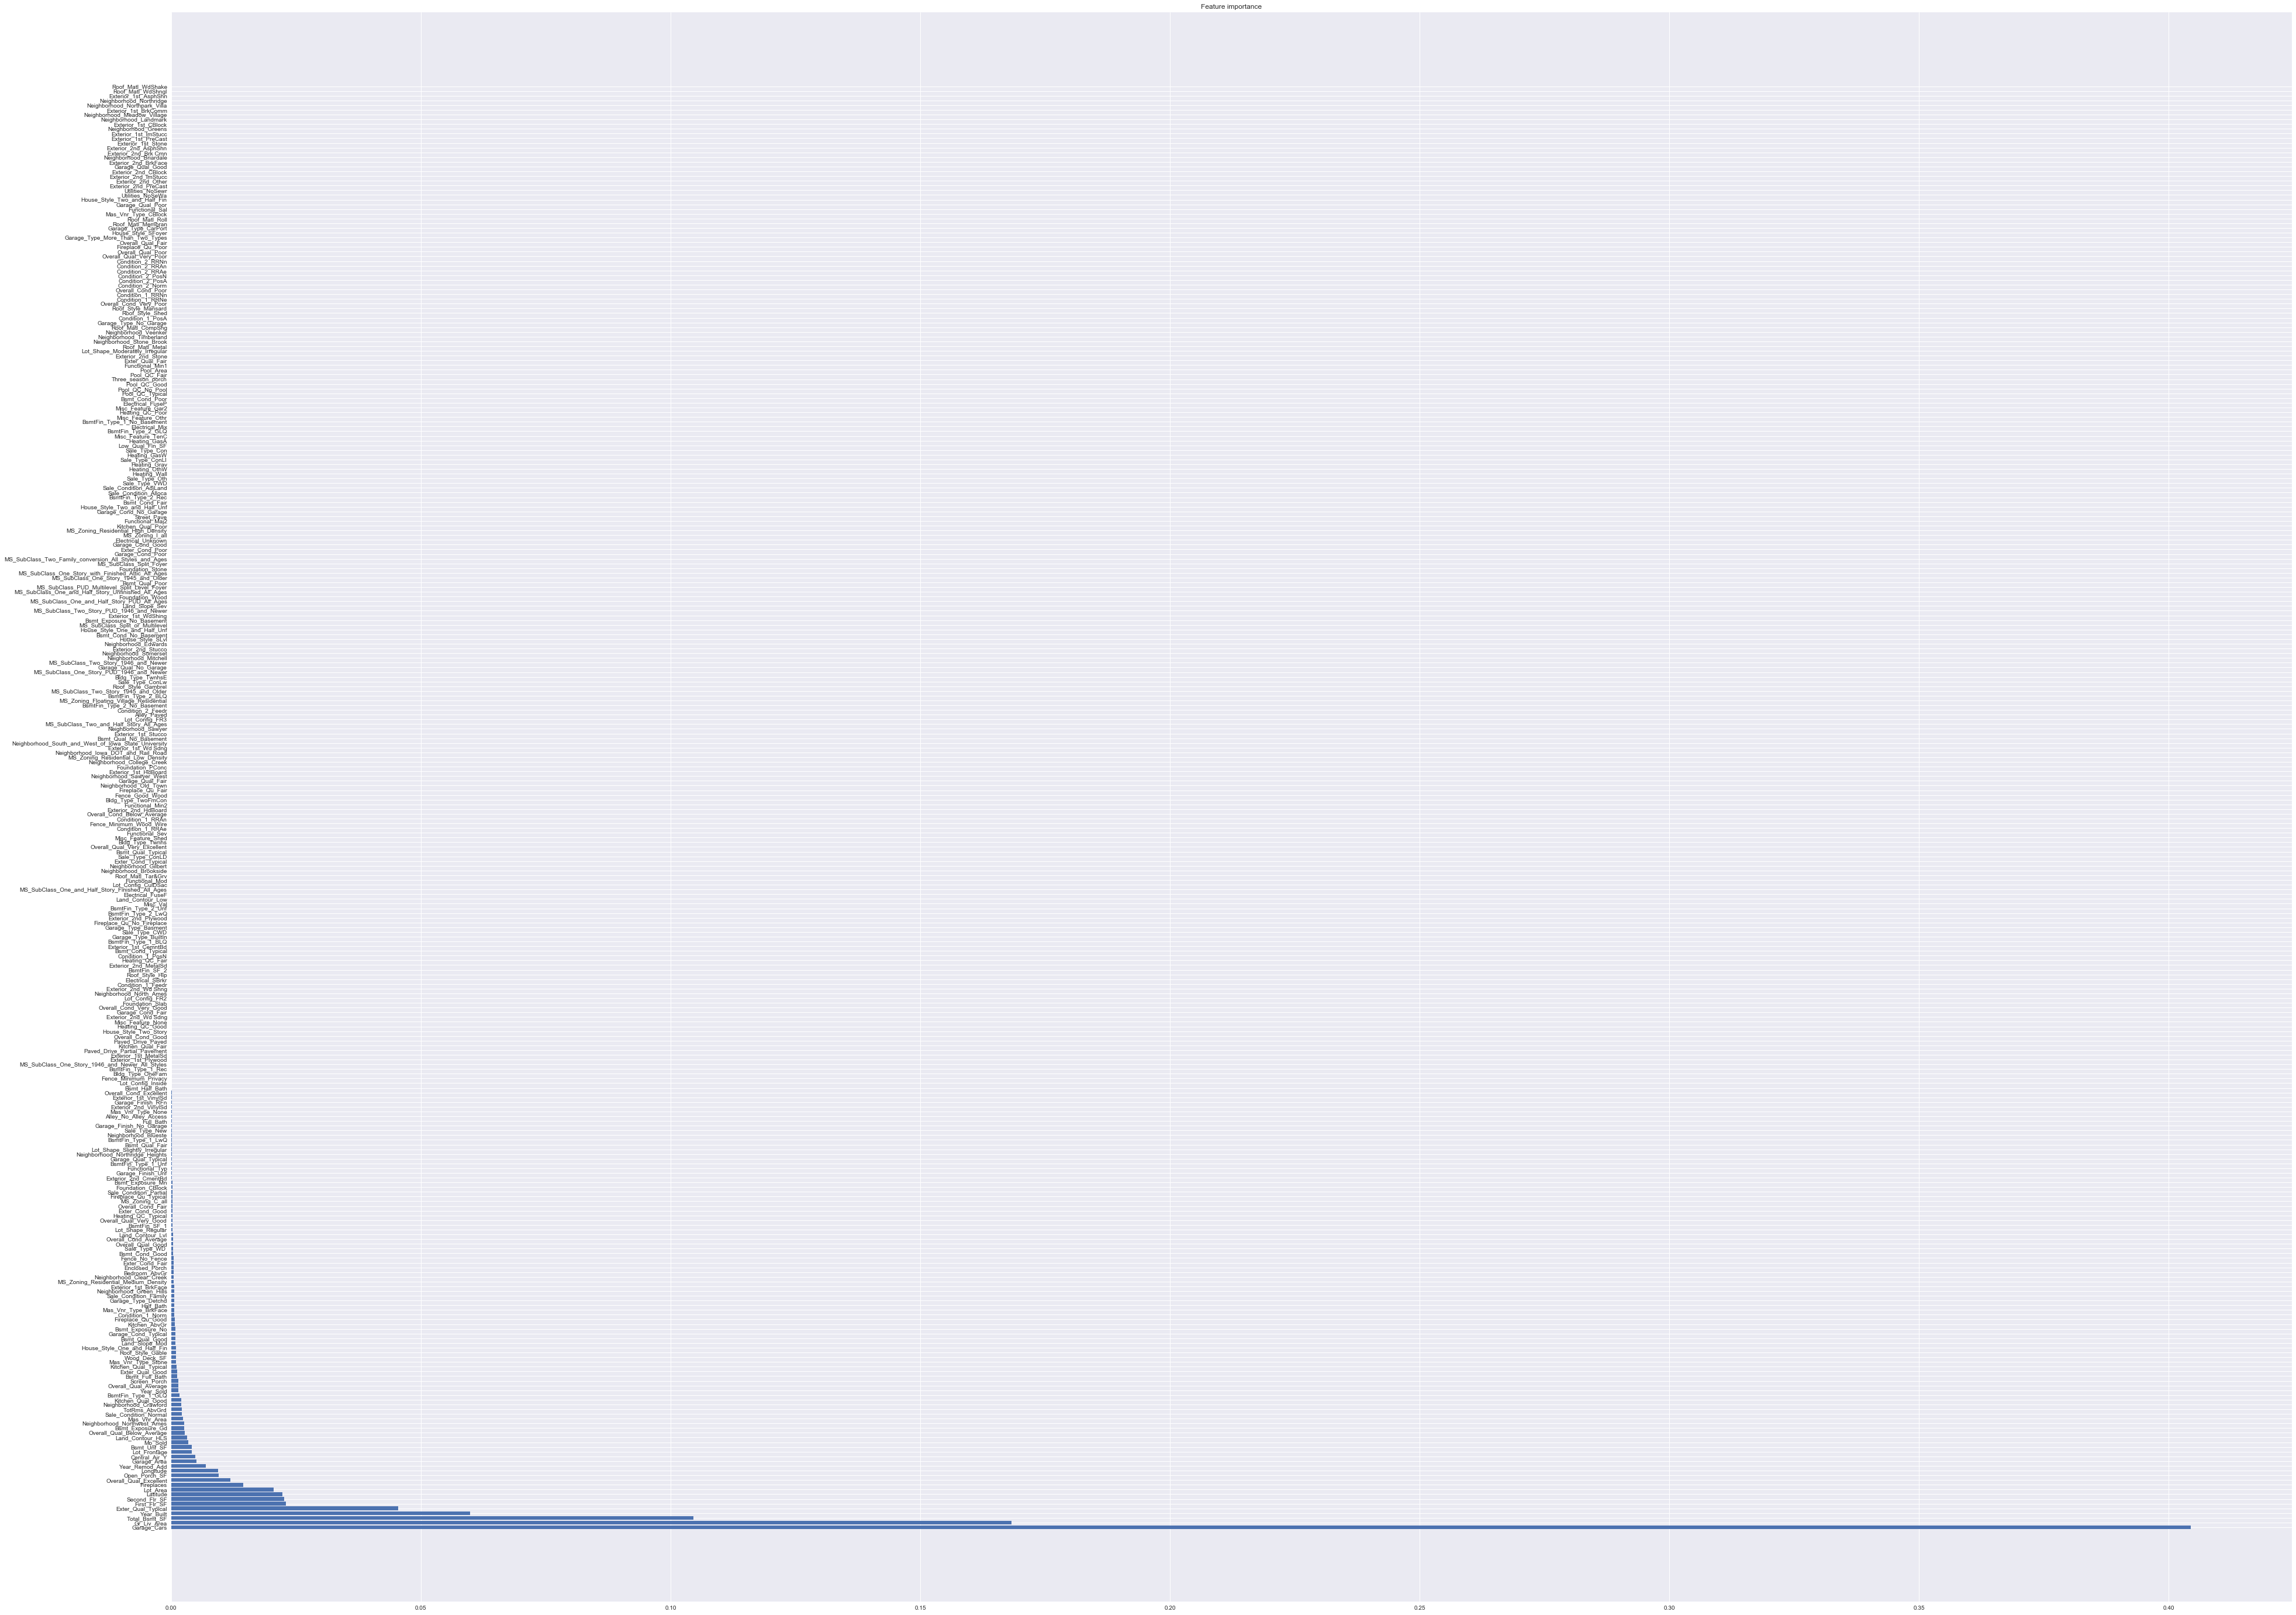

In [10]:
plt.figure(figsize = (65, 50))
funcs.plot_importance(dec_tree_reg, X.columns)

In [11]:
tmp_importance = dec_tree_reg.feature_importances_
sort_importance = np.argsort(tmp_importance)[::-1]
names = [X.columns[i] for i in sort_importance]

### Principales 10 atributos que afectan la prediccion de Sale_Price

In [12]:
names[:10]

['Garage_Cars',
 'Gr_Liv_Area',
 'Total_Bsmt_SF',
 'Year_Built',
 'Exter_Qual_Typical',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Latitude',
 'Lot_Area',
 'Fireplaces']

In [13]:
df_atr = df[names[:10]]

In [14]:
df_atr["Sale_Price"] = df["Sale_Price"]

C:\Users\Eduu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_atr

,Garage_Cars,Gr_Liv_Area,Total_Bsmt_SF,Year_Built,Exter_Qual_Typical,First_Flr_SF,Second_Flr_SF,Latitude,Lot_Area,Fireplaces,Sale_Price
0,2,1656,1080,1960,1,1656,0,42.054035,31770,2,215000
1,1,896,882,1961,1,896,0,42.053014,11622,0,105000
2,1,1329,1329,1958,1,1329,0,42.052659,14267,0,172000
3,2,2110,2110,1968,0,2110,0,42.051245,11160,2,244000
4,2,1629,928,1997,1,928,701,42.060899,13830,1,189900
...,...,...,...,...,...,...,...,...,...,...,...
2925,2,1003,1003,1984,1,1003,0,41.988964,7937,0,142500
2926,2,902,864,1983,1,902,0,41.988314,8885,0,131000
2927,0,970,912,1992,1,970,0,41.986510,10441,0,132000
2928,2,1389,1389,1974,1,1389,0,41.990921,10010,1,170000


# Ejercicio 5: Refactorización del modelo y pickling
* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
* Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
    * Máximo de atributos: Evalúe todos los posibles atributos.
    * Máximo de profundidad: entre 1 a 32.
    * Validaciones cruzadas : 5.
* Reporte la  mejor combinación de  hiperparámetros y  su  desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

In [16]:
X = df_atr.drop(["Sale_Price"], axis = 1)
y = df_atr["Sale_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 63)

In [17]:
dec_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(),
                            {"max_depth": np.linspace(1, 32, 32), # Maximo de ramas en profundidad
                            "max_features": list(range(1, X_train.shape[1]))}, # Ingresar todos los atributos en pasos de a 1
                            cv = 5
                            ).fit(X_train, y_train)

### Mejor combinacion de hiperparametros 

In [18]:
dec_tree_grid_cv.best_params_

{'max_depth': 8.0, 'max_features': 7}

* Maximo de atributos: 5
* Maximo de profundidad: 9

### Desempeño asociado 

In [19]:
dec_tree_grid_cv.best_score_

0.7810893761275326

Desempeño: 0.79

# Pickling
* Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo pickle.
* pickle contiene la función dump, que permite guardar el modelo desarrollado. La forma canónica para desarrollar el pickling es:
* Envíe su modelo y conjuntos de entrenamiento a un compañero.

In [20]:
import pickle

In [21]:
pickle.dump(dec_tree_grid_cv, open('eduardo-lopez-actividad07.sav','wb')) 

In [23]:
df_atr.to_csv("best_atributes.csv",index = False)